In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!pip install -q diffusers transformers accelerate safetensors

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
model_id = "stabilityai/stable-diffusion-2-1"

In [ ]:
print(f"Loading model: {model_id}")
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    safety_checker=None  # Remove if you want content filtering
)

Loading model: stabilityai/stable-diffusion-2-1


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Use DPM Solver for faster generation
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

In [ ]:
# Move pipeline to GPU
pipe = pipe.to(device)

# Optional: Enable memory efficient attention if using GPU
if device == "cuda":
    pipe.enable_attention_slicing()

  0%|          | 0/50 [00:00<?, ?it/s]

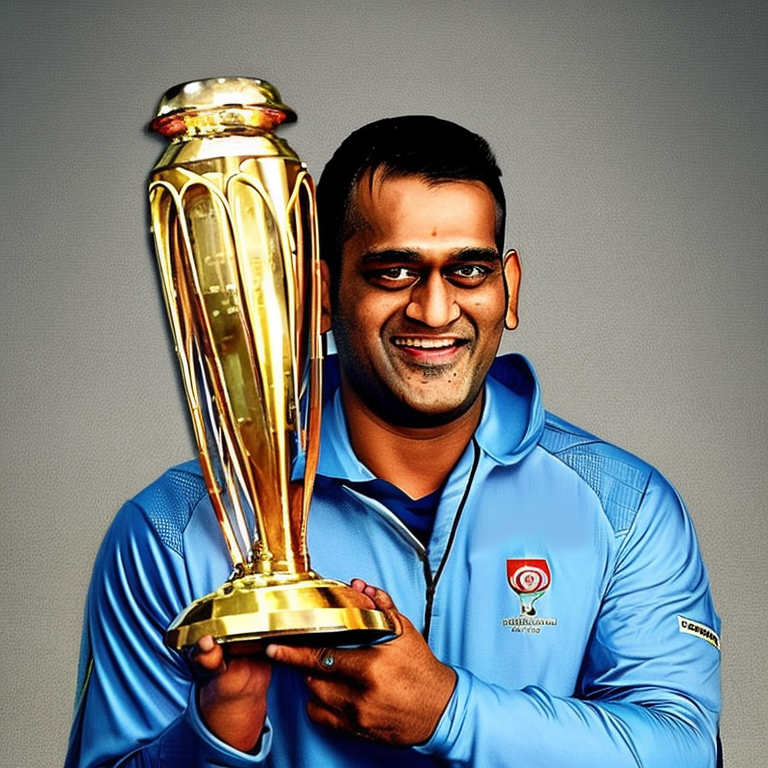

In [ ]:
# Define the prompt
prompt = "Generate me high quality picture of MS DHONI holding the IPL Trophy"

# Generate the image
image = pipe(prompt).images[0]

# Display the image
display(image)

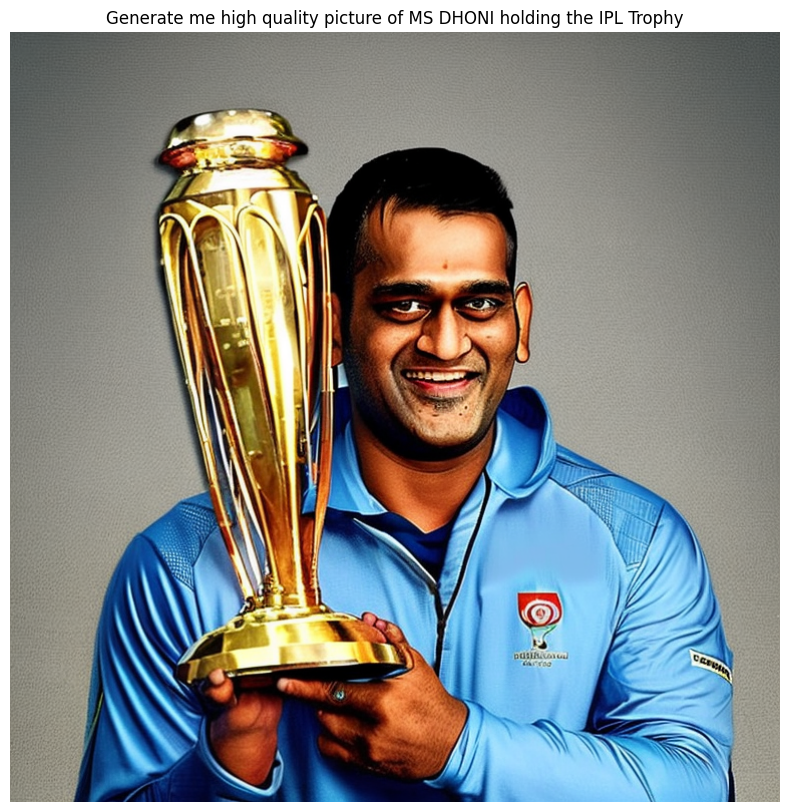

In [ ]:
# Display the generated image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title(prompt)
plt.show()


# Observations:

1.Model Chosen: stabilityai/stable-diffusion-2-1
   
   Reasons for Selection: Light-weight and its manageable in Google Colab's free tier environment (~5GB model size). Tried with stable-diffusion-large and stable-diffusion3-medium both models took longer time to load, but even though its loaded, while generating image, The memory got crashed, since the model was way bigger than Collab GPU allocated memory and space.

2. PROMPTS AND PARAMETERS:

   - Main subject description
   - Quality enhancers: "high quality picture"

3. Observation and quality of pictures

   - Detail Level: High detail in textures, lighting, and shadows
   - Color Accuracy: Natural color gradients and realistic lighting
   - Though face is not realistic since the model was light-weight

4. Any challenges and observations

   Memory Management:
     - Challenge: Google Colab free tier has ~15GB RAM, model uses ~5GB
     - soln: Implemented attention_slicing() to reduce memory spikes
     - Finding: float16 precision reduces memory by ~50% with minimal quality loss

   Model Loading Time:
     - Challenge: First run downloads ~5GB, takes 3-5 minutes
     - Solution: Model is cached after first download
  